In [1]:
import cv2
import matplotlib.pyplot as plt


In [2]:
import os

In [3]:
from ultralytics import YOLO

In [4]:
model = YOLO("best (2).pt")  # Load your YOLO model

In [5]:
def calculate_volume(width, height, depth=None):
    # Assuming depth is the average of width and height for a rough estimate
    if depth is None:
        depth = (width + height) / 2
    # Calculate volume in cubic pixels
    volume = width * height * depth
    # Convert to cubic centimeters (assuming 1 pixel = 0.1 cm)
    volume_cm3 = volume * (0.1 ** 3)
    return volume_cm3

In [6]:
def annotate_image1(image_path, model):
    # Load the image
    img = cv2.imread(image_path)
    
    # Perform inference on the image
    results = model(img)
    
    # Get the original image from the results
    orig_img = results[0].orig_img
    
    # Initialize variables to store areas
    kidney_area = 0
    tumor_area = 0
    
    # Iterate through detected objects
    for result in results[0].boxes.data:
        x1, y1, x2, y2, conf, cls = result
        
        # Calculate width and height of the bounding box
        width = x2 - x1
        height = y2 - y1
        area = width * height  # Area in square pixels
        
        # Determine class (0 for kidney, 1 for tumor - adjust if your classes are different)
        class_id = int(cls.item())
        class_name = "Kidney" if class_id == 0 else "Tumor"
        
        # Set color (green for kidney, red for tumor)
        color = (255, 0, 0) if class_id == 0 else (0, 0, 255)
        
        # Draw bounding box
        cv2.rectangle(orig_img, (int(x1), int(y1)), (int(x2), int(y2)), color, 2)
        
        # Calculate and display volume for the tumor
        if class_id == 1:  # Tumor
            volume = calculate_volume(width, height)
            label = f"{class_name} V:{volume:.2f}cm^3"
            tumor_area = area  # Track tumor area
        else:
            label = class_name
            kidney_area = area  # Track kidney area
        
        # Put label on the image
        cv2.putText(orig_img, label, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
    
    # Calculate tumor percentage
    if kidney_area > 0:
        tumor_percentage = (tumor_area / kidney_area) * 100
    else:
        tumor_percentage = 0
    
    # Display tumor percentage on the image
    cv2.putText(orig_img, f"Tumor %: {tumor_percentage:.2f}%", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
    
    # Display the image with annotations
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

In [7]:
def process_images_in_folder(folder_path, model):
    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
            image_path = os.path.join(folder_path, filename)
            annotate_image1(image_path, model)  # Pass the model to the function

In [8]:
folder_path = 'test_images'


0: 640x640 2 Kidneys, 1 Tumor, 291.6ms
Speed: 18.0ms preprocess, 291.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


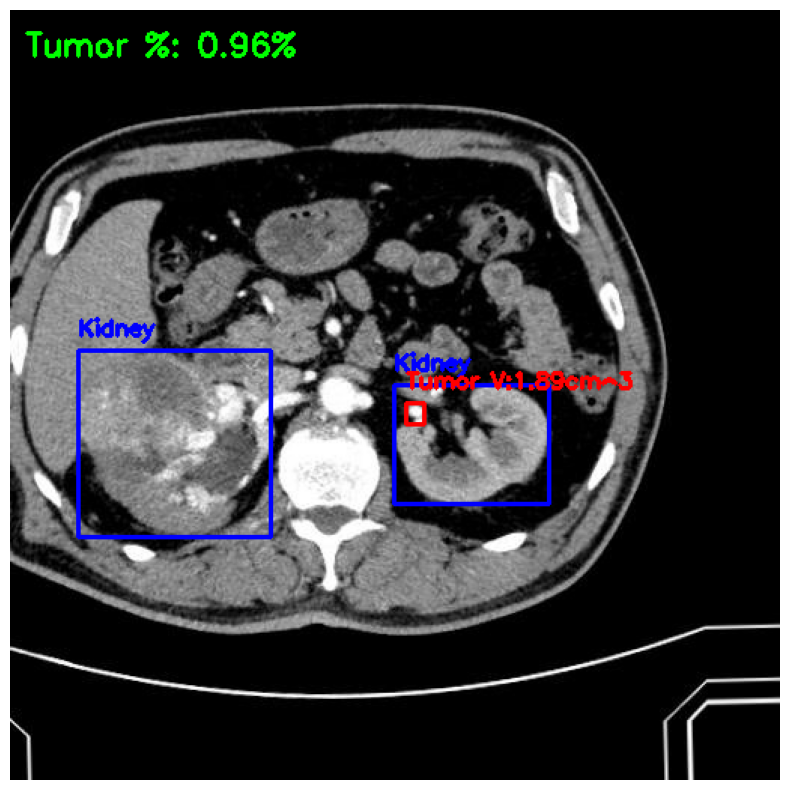


0: 640x640 2 Kidneys, 227.5ms
Speed: 17.1ms preprocess, 227.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


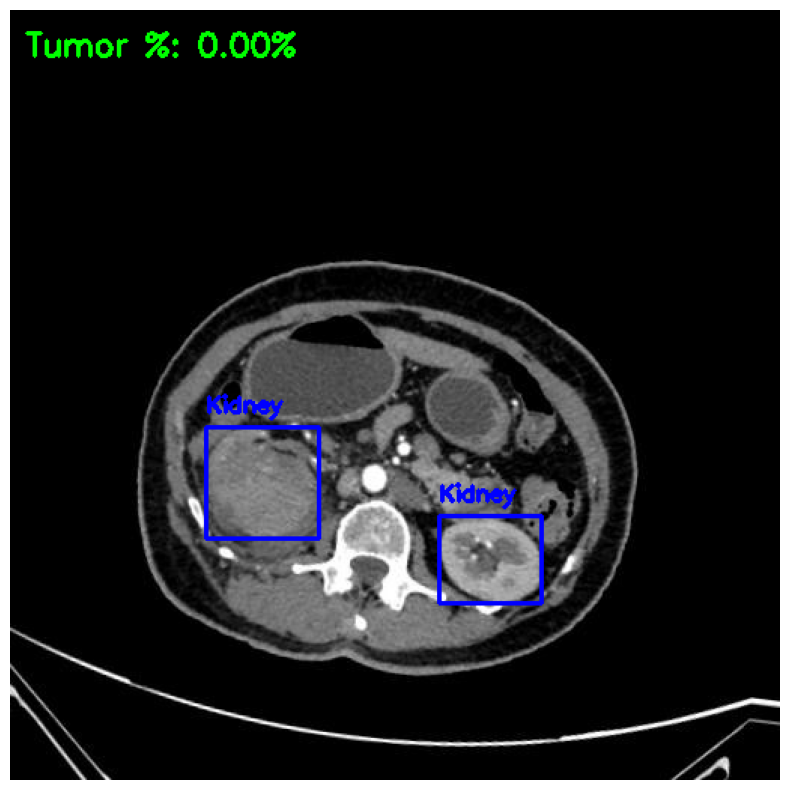


0: 640x640 2 Kidneys, 229.1ms
Speed: 12.3ms preprocess, 229.1ms inference, 15.6ms postprocess per image at shape (1, 3, 640, 640)


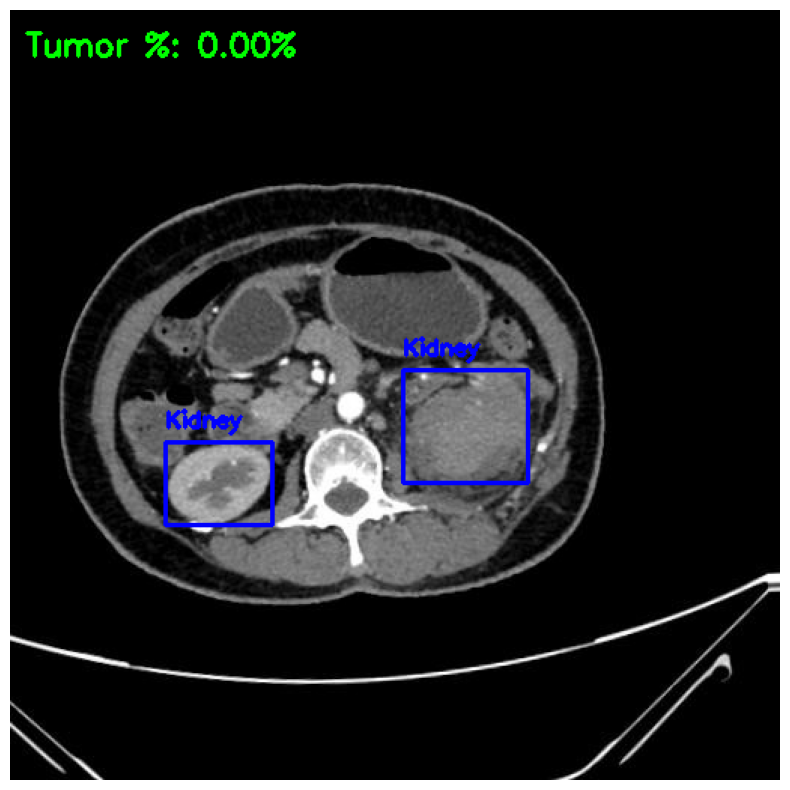


0: 640x640 1 Kidney, 240.3ms
Speed: 15.6ms preprocess, 240.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


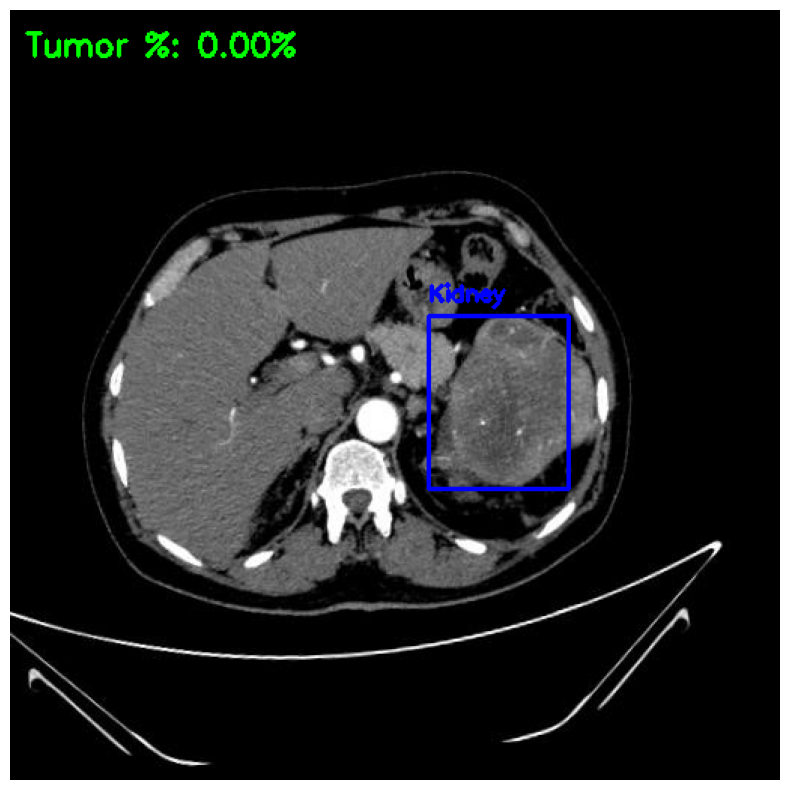


0: 640x640 2 Kidneys, 1 Tumor, 223.1ms
Speed: 6.9ms preprocess, 223.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


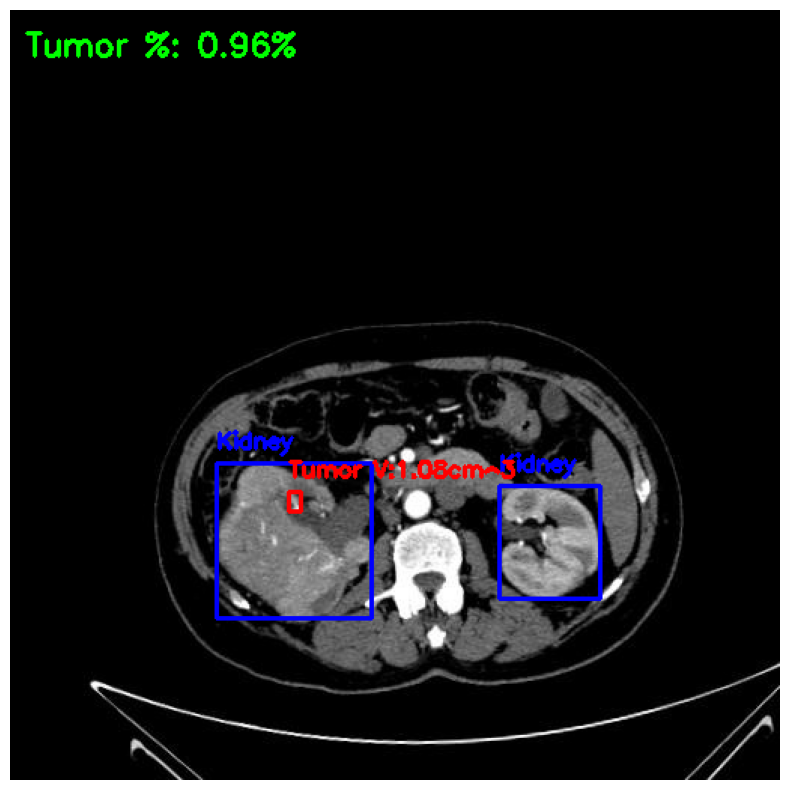

In [9]:
process_images_in_folder("test_images", model)